<a href="https://colab.research.google.com/github/OmerRosen/DifferentProjects/blob/main/Deep_learning_and_Computer_Vision_Useful_snippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gc
import numpy as np
from numpy import save
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

import time
import datetime
import json
import random
import math
import cv2
import pandas as pd
import progressbar
import os
from os import listdir
import matplotlib.pyplot as plt
import pandas as pd
import sys
import csv
from sklearn.preprocessing import PolynomialFeatures



# Image modification


In [ ]:
""" Snippet to quickly load an image and convert if from BGR to either RGB or Grayscale"""
def load_img_omer(path,isGray=False,showImg=False):
  img = cv2.imread(path)

  if img is None:
    print ("Could not load image, please check path %s" %path)
  else:
    #Convert from BGR to RGB
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    if showImg:
      fig= plt.figure(figsize=(10,10))
      plt.title('Loaded image')
      plt.axis('off')
      plt.imshow(img)      
  if isGray:
    # if grayscale:
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    if showImg:
      fig= plt.figure(figsize=(10,10))
      plt.title('Loaded image')
      plt.axis('off')
      plt.imshow(img,comap="gray")
  return img 

In [ ]:
""" Snippet to quickly display a list of images in a plot """

def display_images_in_plot(list_of_images,list_of_titles=[],show_axis=False,figure_size=(25,15),images_per_row=None):
  

  num_of_imgs = len(list_of_images)
  plot_columns = 0
  plot_rows = 0

  if images_per_row:
    plot_columns = images_per_row
    plot_rows = int(num_of_imgs/images_per_row)
  elif num_of_imgs==1:
    plot_columns = 1
    plot_rows = 1
  elif num_of_imgs==2:
    plot_columns=2
    plot_rows=1
  elif num_of_imgs%5==0:
    plot_columns=5
    plot_rows=num_of_imgs/5
  elif num_of_imgs%4==0:
    plot_columns=4
    plot_rows=num_of_imgs/4
  elif num_of_imgs%3==0:
    plot_columns=3
    plot_rows=num_of_imgs/3
  elif num_of_imgs%2==0:
    plot_columns=2
    plot_rows=num_of_imgs/2
  else:
    plot_columns=5
    plot_rows=math.ceil(num_of_imgs/5)

  if num_of_imgs>10:
    figure_size = (25,5*plot_rows)
  fig = plt.figure(figsize=figure_size)

  for i, img in enumerate(list_of_images):
    ax = fig.add_subplot(plot_rows,plot_columns,i+1)
    if list_of_titles==[]:
      ax.set_title('Image number %s' %(i+1))
    else:
      ax.set_title(list_of_titles[i])
    if not show_axis:
      ax.set_axis_off()
    if len(img.shape)<3: #Grayscale
      ax.imshow(img,cmap='gray')
    else:
      ax.imshow(img)


In [ ]:

def rotate_img_x_degrees(img,degrees,backgroundcolor=(255,255,255),keepOriginalScale=True):
  w,h,_ = img.shape
  img_center = (w/2,h/2) #Center is midway
  # create a set-up for rotation (center of image, degree, ration)
  rotation_setup = cv2.getRotationMatrix2D(img_center,degrees,1)

  if keepOriginalScale:
    rotated_img = cv2.warpAffine(img,rotation_setup,(w,h))
  else:
    # To adjust the canvas size after the rotation, calculate the new width and height of the rotated image:
    cos = np.abs(rotation_setup[0, 0])
    sin = np.abs(rotation_setup[0, 1])
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    rotation_setup[0, 2] += (nW / 2) - w/2
    rotation_setup[1, 2] += (nH / 2) - h/2
  
    # use the set-up to apply to image (original image, set-up, image size)
    rotated_img = cv2.warpAffine(img,rotation_setup,(nW,nH),borderValue=backgroundcolor)

  return rotated_img

def resize_image(img,desired_width=None,desired_height=None):

  img_height,img_width,_ = img.shape

  if (desired_height is None and desired_width is None):
    print ("No scale specified")
  elif (desired_height is not None and desired_width is None):
    image_scale = desired_height/img_height
    new_img_size = (round(img_width * image_scale), round(img_height * image_scale) )
  elif (desired_height is None and desired_width is not None):
    image_scale = desired_width/img_width
    new_img_size = (round(img_width * image_scale), round(img_height * image_scale) )
  else: #Scale each part seperatly 
    h_scale = desired_height/img_height
    w_scale = desired_width/img_width
    new_img_size = (round(img_width * w_scale), round(img_height * h_scale) )
 
  new_img = cv2.resize(img, new_img_size, interpolation = cv2.INTER_AREA)
  return new_img

In [ ]:
""" Snippet plot the training results"""

def plot_training_results(model_train_history):
  # Get the number of epochs the training was run for
  num_epochs = len(model_train_history["loss"])

  # Plot training results
  fig = plt.figure(figsize=(15,20))

  #Split results between loss and accuracy
  #loss
  axs_Loss = fig.add_subplot(2,1,1)
  axs_Loss.set_title('Training History - Loss')
  # Plot all metrics
  for metric in model_train_history:
    if metric.find('loss')!=-1:
      axs_Loss.plot(np.arange(0, num_epochs), model_train_history[metric], label=metric)
  axs_Loss.set_ylim(0,1)
  axs_Loss.legend()

  #accuracy
  axs_Accuracy = fig.add_subplot(2,1,2)
  axs_Accuracy.set_title('Training History - Accuracy')
  # Plot all metrics
  for metric in model_train_history:
    if metric.find('loss')==-1:
      axs_Accuracy.plot(np.arange(0, num_epochs), model_train_history[metric], label=metric)
  axs_Accuracy.legend()
  axs_Accuracy.set_ylim(0,1)

  plt.tight_layout()
  plt.show()

In [ ]:
""" Snippet to evaluate the actual test results and plot sample images with their titles"""

def test_model(model,x_test,y_test_matrix,desiredImageShape=None,plotResults=True):
  if desiredImageShape is None:
    desiredImageShape=x_test[0].shape
  testResults_loss,testResults_accuracy = model.evaluate(x_test,y_test_matrix)
  print('Test results: Loss: %s, Accuracy: %s '%(round(testResults_loss,2),round(testResults_accuracy,2)))
  numOfSamples = 9
  sampleList_imgs = []
  sampleList_titles = []
  for i in range(numOfSamples):
    num = random.randint(0,len(x_test))
    img = x_test[i]
    imglist = np.reshape(img,(1,7500))
    actualClass = np.argmax(y_test_matrix[i])
    prediction = model.predict(imglist)[0]
    predictedClass = np.argmax(prediction)
    title = 'Predicted: %s (%s). Actual: %s (%s)'%(reverseClassDict[predictedClass],predictedClass,reverseClassDict[actualClass],actualClass)
    #print(title)
    if img.shape != desiredImageShape:
      img = np.reshape(img,desiredImageShape)
    sampleList_imgs.append(img)
    sampleList_titles.append(title)

  display_images_in_plot(sampleList_imgs,sampleList_titles)

# Open And Display Json

In [ ]:
import pandas as pd

def openAndDisplayJson(jsonPath,listOfMatricesToCompare=[],keyWordsToSearch=[]):
    # Compare model metrics
    matric_save_path = jsonPath
    allMatrics = pd.read_json(matric_save_path)
    entireItemList = allMatrics.values[0]

    #keyWordsToSearch - Find the string in the list:
    if keyWordsToSearch!=[]:
      for keyWord in keyWordsToSearch:
        for item in entireItemList:
          if keyWord in item:
            listOfMatricesToCompare.append(item)
        if listOfMatricesToCompare==[]: #If not value was found, don't leave the list empty
          listOfMatricesToCompare.append(keyWord)

    if listOfMatricesToCompare==[]:
      compare_json=allMatrics.T
      
    else:
      compare_json=allMatrics.filter(items=listOfMatricesToCompare).T

    compare_json.head(20).sort_values('actual_accuracy', ascending=False)
    return compare_json

openAndDisplayJson(jsonPath='/content/drive/My Drive/Harvard HW/Course 2 - hw2/Matrics_Output_Compare.json',listOfMatricesToCompare=['theUltimateCNN_Draft1'] ,keyWordsToSearch=['improved'])

,saveName,optimizerType,learning_rate,trainable_parameters,execution_time,training_accuracy,actual_accuracy,batch_size,epochs,lossType,model_size,image_shape
theUltimateCNN_Draft1,theUltimateCNN_Draft1,RAdam,0.005,47542627,9.03,0.42,0.81,128,50,categorical_crossentropy,380473960,50X50
improvedCNNModel_32_filter,improvedCNNModel_32_filter,SGD,0.0,1280963,0.93,0.56,0.72,64,30,categorical_crossentropy,5144104,50X50
improvedCNNModel_64_filter,improvedCNNModel_64_filter,SGD,0.0,5121923,1.08,0.56,0.73,64,30,categorical_crossentropy,20507560,50X50
improvedCNNModel_128_filter,improvedCNNModel_128_filter,SGD,0.0,20483843,1.46,0.56,0.75,64,30,categorical_crossentropy,81954472,50X50
improvedCNNModel_256_filter,improvedCNNModel_256_filter,SGD,0.001,81927683,2.48,0.56,0.74,64,30,categorical_crossentropy,327730360,50X50
improvedCNNModel_128_sigmoid,improvedCNNModel_128_sigmoid,SGD,0.001,20483843,1.57,0.43,0.58,64,30,categorical_crossentropy,81954472,50X50
improvedCNNModel_128_softmax,improvedCNNModel_128_softmax,SGD,0.001,20483843,2.78,0.41,0.42,64,30,categorical_crossentropy,81954472,50X50
improvedCNNModel_128_relu_lr0.001,improvedCNNModel_128_relu_lr0.001,SGD,0.0001,20483843,1.43,0.52,0.67,64,30,categorical_crossentropy,81954440,50X50
improvedCNNModel_128_relu_lr0.005,improvedCNNModel_128_relu_lr0.005,SGD,0.005,20483843,1.44,0.58,0.78,64,30,categorical_crossentropy,81954472,50X50


# Progress bar

In [ ]:
import time
import progressbar

for i in progressbar.progressbar(range(100)):
    time.sleep(0.02)


100% (100 of 100) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


In [ ]:
listOfItemsToIterateOver = [2,5,7,2,5,8,4,7,3,2,4,55,8,9,5,3,7]
listLength_ProgressBar = len(listOfItemsToIterateOver)

bar = progressbar.ProgressBar(maxval=listLength_ProgressBar-1, widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()
for i,item in enumerate(listOfItemsToIterateOver):
  #Perform action
  time.sleep(0.2)

  bar.update(i)

[========================================================================] 100%

In [ ]:
from tqdm import tqdm
import time

for i in tqdm(range(10000)):
  time.sleep(0.2)

  1%|          | 118/10000 [00:24<33:41,  4.89it/s]


KeyboardInterrupt: ignored

# Sort list of tuples per value

In [ ]:
sampleListOfTuples = [('able', 99.0),
 ('access', 69.0),
 ('accuracy', 32.0),
 ('act', 48.0),
 ('action', 80.0),
 ('administration', 84.0),
 ('advice', 30.0),
 ('age', 33.0),
 ('ai', 70.0),
 ('album', 64.0),
 ('alejandropiad', 87.0),
 ('algorithms', 31.0),
 ('amazing', 119.0),
 ('america', 283.0),
 ('american', 266.0),
 ('americans', 208.0),
 ('amp', 638.0),
 ('answer', 64.0),
 ('app', 33.0),
 ('applemusic', 32.0),
 ('approach', 50.0),
 ('area', 39.0)]

print("List before: ")
print(sampleListOfTuples)

sampleListOfTuples.sort(key=lambda x:x[1] ,reverse=True)

print("List after: ")
print(sampleListOfTuples)

List before: 
[('able', 99.0), ('access', 69.0), ('accuracy', 32.0), ('act', 48.0), ('action', 80.0), ('administration', 84.0), ('advice', 30.0), ('age', 33.0), ('ai', 70.0), ('album', 64.0), ('alejandropiad', 87.0), ('algorithms', 31.0), ('amazing', 119.0), ('america', 283.0), ('american', 266.0), ('americans', 208.0), ('amp', 638.0), ('answer', 64.0), ('app', 33.0), ('applemusic', 32.0), ('approach', 50.0), ('area', 39.0)]
List after: 
[('amp', 638.0), ('america', 283.0), ('american', 266.0), ('americans', 208.0), ('amazing', 119.0), ('able', 99.0), ('alejandropiad', 87.0), ('administration', 84.0), ('action', 80.0), ('ai', 70.0), ('access', 69.0), ('album', 64.0), ('answer', 64.0), ('approach', 50.0), ('act', 48.0), ('area', 39.0), ('age', 33.0), ('app', 33.0), ('accuracy', 32.0), ('applemusic', 32.0), ('algorithms', 31.0), ('advice', 30.0)]


# Pickle save and pickle Load

In [ ]:
import pickle 
import os
import pandas as pd

In [ ]:
#df can be converted directly to a pickle file:

sample_df = pd.DataFrame(data=[1,2,3,4])

sample_df.to_pickle("corpus.pkl") #If not path specified - Will save to session

In [ ]:
class exampleDumbClass():
  def __init__(self):
    print ('This is kinda dumb')

  def confirmPickleLoaded(self):
    print("Holy molly, you were able to load this pickle class!!")

instanceOfThisDumbClass = exampleDumbClass()


This is kinda dumb


In [ ]:
#Save ANY object as a pickle file:

examplePath = "/content/drive/MyDrive/Harvard HW/Code Snippets/Pickled Objects/Instance Of An Object Example.pkl"


In [ ]:
pickle.dump(instanceOfThisDumbClass, open(examplePath, "wb"))

In [ ]:
#Load pickle file:

if os.path.exists(examplePath):

  instanceOfThisDumbClass_FromPickle = pickle.load(open(examplePath, "rb"))

#Please note that the class need to be defined in the session in order for the loaded model to work

instanceOfThisDumbClass_FromPickle.confirmPickleLoaded()

Holy molly, you were able to load this pickle class!!


# Try and Except with error output

In [ ]:
import inspect

def functionToFailAndRaisError():
  try:
    14314/0
  except Exception as e:
    functionName = inspect.currentframe().f_code.co_name
    print("Excepion on %s"%(functionName))
    print(e)

functionToFailAndRaisError()

Excepion on functionToFailAndRaisError
division by zero


# Plot with icons on X-Grid

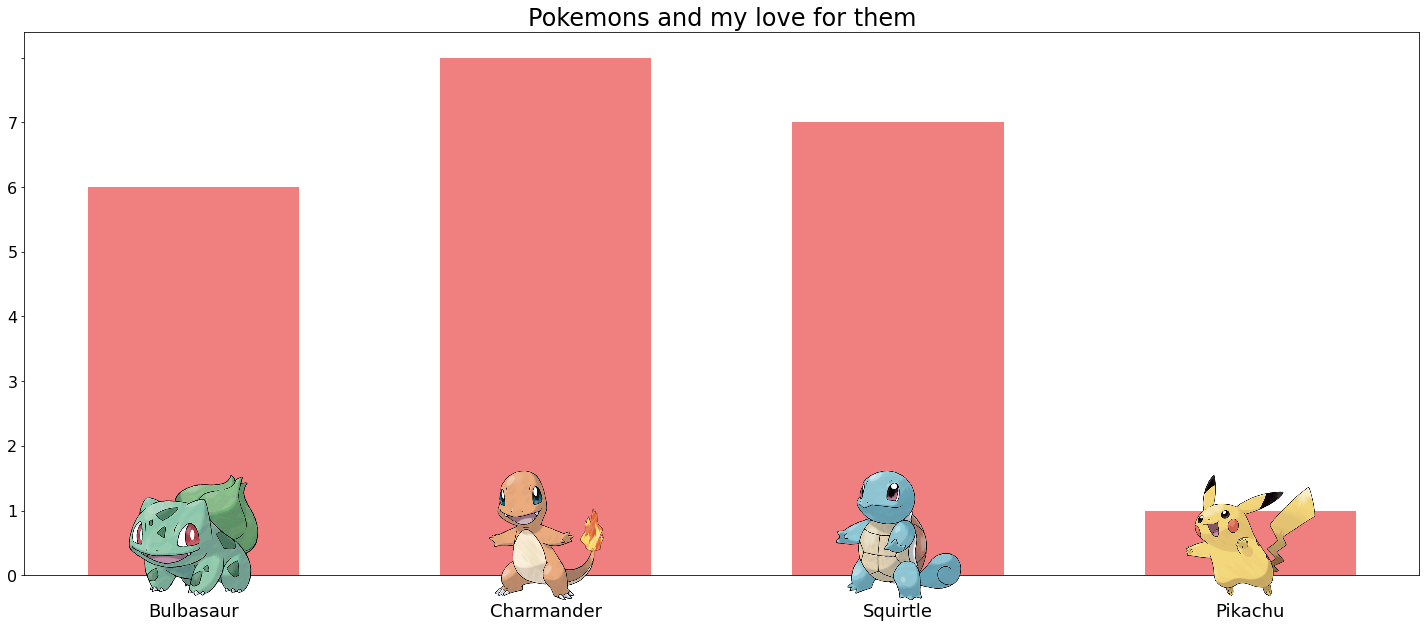

In [ ]:
#This plotting works best when your icons can be extracted based on your X labels, however, can work just as well if you feed it a list of URL manually.


import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen


#Step one, set your list of XLabels, YValues and the XLabels image URLS: (If you already have the url list you can skip this stage)

plotTitle = "Pokemons and my love for them"

pokemonNamesAndIds = {'Bulbasaur':'001','Charmander':'004','Squirtle':'007','Pikachu':'025'}
howMuchIThinkTheyAreAesome = [6,8,7,1]

baseUrlStracture = 'https://assets.pokemon.com/assets/cms2/img/pokedex/full/{PokemonId}.png'
listOfUrls = [baseUrlStracture.replace('{PokemonId}',pokemonId) for pokemonId in pokemonNamesAndIds.values()]

# Step two: Define your x and y labels:

xGridTitles = list(pokemonNamesAndIds.keys()) #The X Labels
xGridImgUrls = listOfUrls #An image URL for each label
yLabel = howMuchIThinkTheyAreAesome # y value per label


# Set three - Configure Hyper parameters for the plot:

zoomInOutOfOriginalImage = 0.30   # This will increase/decrease the icon's size
iconHeight = +40                  # This will set your icon y location (Set it to a positive number so that the icon won't cover the text)
xLabelPadding = 40                # This will set the space between the x grid and the label
barColor = 'lightcoral'           # This will set the bar's color. Basic option: blue,red,green. For more colors, see: https://i.stack.imgur.com/lFZum.png
barWidth = 0.6                    # This will set how wide will each bar be.
figsize = (25,10)                 # This will set your X wiedth and y Height
fontSize_title = 24               # Font size for the plot's title
fontSize_X_label = 18             # Font size for the X labels
fontSize_Y_label = 16             # Font size for the y labels


# Step four - Define function to get image from the URL

def get_img_from_URL(imageURL):
  downloadedImg = urlopen(imageURL)
  im = mpimg.imread(downloadedImg,0)
  return im

# Step five - Define function to place image for each bar - Returne and updated ax

def offset_image(coord, userName,imageURL, ax):

  img = get_img_from_URL(imageURL)
  im = OffsetImage(img, zoom=zoomInOutOfOriginalImage)
  im.image.axes = ax

  ab = AnnotationBbox(im, (coord, 0),  xybox=(0., iconHeight), frameon=False,
                      xycoords='data',  boxcoords="offset points", pad=0)

  ax.add_artist(ab)


#Step six - Define fig and plot the data in the fig

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot()

#Plot Bar
ax.bar(range(len(xGridTitles)), yLabel, width=barWidth,align="center",color=barColor)
#Set X lables
ax.set_xticks(range(len(xGridTitles)))
ax.set_xticklabels(xGridTitles,fontSize=fontSize_X_label)
ax.tick_params(axis='x', which='major', pad=24,labelsize=fontSize_X_label)
#Set Y lables
ax.set_yticklabels(range(max(yLabel)),fontSize=fontSize_Y_label)
#Set label
ax.set_title(plotTitle,fontSize=fontSize_title)

#For each label, update the ax subplot with the icon placement:

for i, x_title in enumerate(xGridTitles):
  x_url = xGridImgUrls[i]
  offset_image(i, x_title,x_url, ax)

plt.show()

# Measure execution time

In [ ]:
import time
from time import sleep,time

def a_random_Func():

  #Start the clock:
  start_time = time()
  new_time = time()

  sleep(1)

  timeFromStart = time() - start_time
  timeFromLast = time() - new_time
  new_time = time()
  print('Time from Start: %s, time from last: %s'%(timeFromStart,timeFromLast))

  sleep(3)

  timeFromStart = time() - start_time
  timeFromLast = time() - new_time
  new_time = time()
  print('Time from Start: %s, time from last: %s'%(timeFromStart,timeFromLast))

a_random_Func()

Time from Start: 1.0029234886169434, time from last: 1.0029261112213135
Time from Start: 4.006378889083862, time from last: 3.0034544467926025


# Plot line and scatter

## Line Plots

In [ ]:
# RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
car_dekho_full = pd.read_csv('/content/drive/MyDrive/Harvard HW/Course 3 - HW2/cs109a_hw2/data/car_dekho_full.csv')
car_dekho_full.head(10)

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000
5,2016,0.51,0.94,24000
6,2015,5.95,9.40,36000
7,2016,11.25,13.60,22671
8,2011,0.35,1.05,30000
9,2015,4.65,7.20,48767


In [ ]:
X = car_dekho_full[["MRP"]]
y = car_dekho_full["Current_Selling_Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=109)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


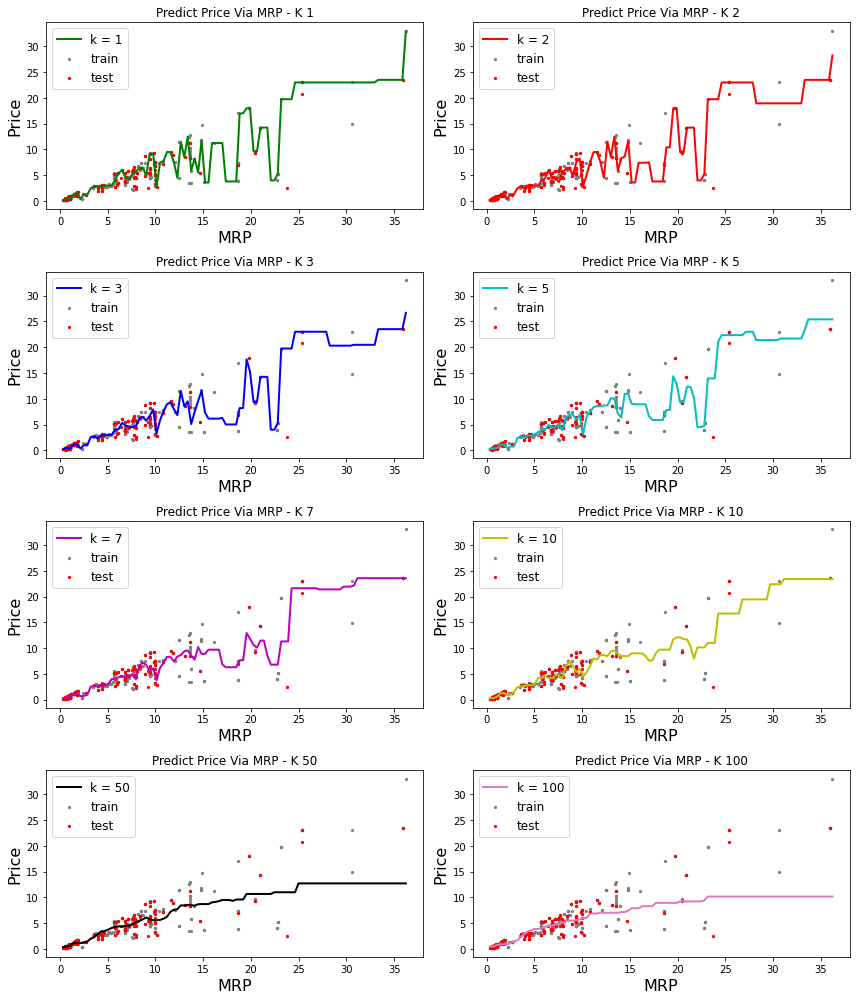

In [ ]:
fig = plt.figure(figsize=(12, 14))
fig.subplots_adjust(hspace = .5, wspace=.3)

k_list = [1,2,3,5,7,10,50,100]
c_list = ['g','r','b','c','m','y','k','tab:pink']

mse_list = []

for i,k in enumerate(k_list):
    
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test.values)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

    xvals = np.linspace(X_train.min(),X_train.max(),100)
    ypreds = model.predict(xvals)
    
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(xvals, ypreds,'-',label = f'k = {k}',linewidth=2,color = c_list[i])
    
    #ax.plot(X_train, y_train,'x',label='train',color='r')
    ax.scatter(X_train, y_train, s=5, color="grey", label="train")
    #ax.plot(X_test, y_test,'x',label='test',color='k')
    ax.scatter(X_test, y_test, s=5, color="red", label="test")
    ax.set_xlabel('MRP',fontsize=16)
    ax.set_ylabel('Price',fontsize=16)
    ax.set_title(f'Predict Price Via MRP - K {k}')
    ax.legend(loc='upper left',fontsize=12)
    plt.tight_layout()
    plt.plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100)*30
x

In [ ]:
# bins = Data variation clusters
# rwidth  = Spacing between blocks
# alpha = Transperency of bar
plt.hist(x,bins=10,color='#B5DBFF',rwidth=0.8,alpha=0.8,edgecolor='black', linewidth=1.2,orientation='horizontal')
plt.show()

## Scatter Plot

In [ ]:
# your code here
fig = plt.gcf()
fig.set_size_inches(12,10)
ax = fig.add_subplot(1,1,1)

mark_size = 10
mu = 0.6
not_admitted_noise = sigma * np.random.randn(X_train[not_admitted_filter].shape[0]) + mu
admitted_noise     = sigma * np.random.randn(X_train[admitted_filter].shape[0]) + mu

ax.scatter(X_train[not_admitted_filter]['ap']+not_admitted_noise, X_train[not_admitted_filter]['test_score'],label='Not Admitted',s=mark_size)
ax.scatter(X_train[admitted_filter]['ap']+admitted_noise, X_train[admitted_filter]['test_score'],label='Admitted',s=mark_size)

ax.legend(loc='lower right',fontsize=10)
ax.set_xlabel('test_score')
ax.set_ylabel('ap',rotation=0,labelpad=25)
ax = plt.gca()
ax.set_title('test_score vs ap')

NameError: ignored

## Histogram Plot - Joined and Seperated

In [ ]:
from collections import Counter
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

coef_df = pd.DataFrame([[ 2.01038592e+00, -2.35391873e+00,  3.47085586e-01,
         5.62573447e+00, -2.78248156e-01, -2.79782048e+00,
         3.94232651e-02,  4.05451472e-01],
       [ 1.54119707e+00, -5.36104986e-01,  9.53367108e-02,
         2.81099089e+00,  1.49153539e-01, -1.49352226e+00,
        -5.64796206e-02,  2.21990092e-01],
       [ 2.61680811e+00, -3.41425781e-02, -1.80555793e+00,
         2.03773436e+00,  1.13328692e+00, -1.09361456e+00,
        -2.08553358e-01,  1.56961322e-01],
       [ 2.50337379e+00,  7.22696801e-01, -6.21520075e-01,
         1.56276604e+00,  1.49048345e-01, -9.81121229e-01,
        -1.00206618e-02,  1.48500692e-01],
       [ 2.58756691e+00, -1.91880962e+00, -8.85068176e-01,
         4.71036988e+00,  3.19736741e-01, -2.28657548e+00,
        -4.38960069e-02,  3.23532177e-01],
       [ 3.07189403e+00, -4.14299919e-01, -2.60003233e+00,
         2.03195662e+00,  1.47654839e+00, -9.97143150e-01,
        -2.50587006e-01,  1.35377404e-01],
       [ 2.72424037e+00, -1.52611139e+00, -2.24116812e+00,
         3.17632298e+00,  1.38382518e+00, -1.37146470e+00,
        -2.44051451e-01,  1.76545101e-01],
       [ 2.86013907e+00, -2.00655917e+00, -2.16814553e+00,
         5.07382451e+00,  1.37077231e+00, -2.52446862e+00,
        -2.54372158e-01,  3.67976410e-01],
       [ 2.54856949e+00, -7.35923656e-01, -1.10254915e+00,
         3.06227203e+00,  5.80556235e-01, -1.64898531e+00,
        -1.01333464e-01,  2.48852844e-01],
       [ 2.17964524e+00, -1.15309664e+00, -8.06481340e-01,
         3.56222146e+00,  5.60835160e-01, -1.65375372e+00,
        -1.12799126e-01,  2.17881137e-01],
       [ 2.14808898e+00, -1.34359383e+00, -4.24101626e-01,
         4.53270979e+00,  2.67845215e-01, -2.37609396e+00,
        -5.81221194e-02,  3.50067271e-01],
       [ 2.96123205e+00, -2.69674161e+00, -1.53227028e+00,
         4.96898512e+00,  7.21087460e-01, -2.22642167e+00,
        -1.14648694e-01,  3.00143333e-01],
       [ 2.68624487e+00, -9.13795495e-01, -8.32402973e-01,
         3.06263592e+00,  3.17292403e-01, -1.52931044e+00,
        -4.80504202e-02,  2.19620251e-01],
       [ 2.36447683e+00,  3.03255837e-01, -8.90035016e-01,
         1.98238388e+00,  5.12704126e-01, -1.18726078e+00,
        -9.47190095e-02,  1.83768672e-01],
       [ 2.99016486e+00, -1.14925383e+00, -1.73863928e+00,
         3.63298260e+00,  8.58723664e-01, -1.81219416e+00,
        -1.41925986e-01,  2.54202047e-01],
       [ 2.52441726e+00,  3.57792091e-02, -1.20811841e+00,
         2.15934293e+00,  7.32373239e-01, -1.12197590e+00,
        -1.33192355e-01,  1.53049182e-01],
       [ 3.11508161e+00, -1.64369778e+00, -1.99242040e+00,
         4.44009780e+00,  1.12607055e+00, -2.20465492e+00,
        -2.05928271e-01,  3.10886967e-01],
       [ 2.80830670e+00, -2.80347104e+00, -1.32505801e+00,
         5.56544707e+00,  7.10221806e-01, -2.50381584e+00,
        -1.25818948e-01,  3.34900846e-01],
       [ 2.88289527e+00,  3.91704554e-01, -1.02845204e+00,
         1.31875960e+00,  4.21987451e-01, -7.22972883e-01,
        -6.90596313e-02,  9.84393741e-02],
       [ 2.14557272e+00, -1.08026240e+00, -5.84251108e-01,
         3.36180703e+00,  4.99879391e-01, -1.64315055e+00,
        -1.16025395e-01,  2.29221642e-01],
       [ 2.52547539e+00, -6.40102497e-01, -1.17262305e+00,
         3.37570151e+00,  7.29300071e-01, -1.69381817e+00,
        -1.38794866e-01,  2.33949773e-01],
       [ 2.95120900e+00, -1.09733355e+00, -2.44578158e+00,
         3.37363144e+00,  1.42660640e+00, -1.60927156e+00,
        -2.40759464e-01,  2.19321710e-01],
       [ 2.08212453e+00, -1.70174816e+00, -5.85725181e-01,
         3.74334210e+00,  4.30600604e-01, -1.71868687e+00,
        -9.26953525e-02,  2.35200766e-01],
       [ 2.47951007e+00,  3.99723990e-01, -8.66888667e-01,
         2.19808340e+00,  5.57284320e-01, -1.24718448e+00,
        -1.14684139e-01,  1.80192707e-01],
       [ 2.75341995e+00, -2.17792214e+00, -1.47407117e+00,
         4.57520702e+00,  7.64744303e-01, -2.16265582e+00,
        -1.29584389e-01,  3.03017245e-01],
       [ 1.96499423e+00, -7.85045477e-01,  5.46123066e-01,
         3.01951452e+00, -4.99113432e-01, -1.63365589e+00,
         9.87529976e-02,  2.52864946e-01],
       [ 3.35558438e+00,  1.54198613e-01, -2.93299169e+00,
         1.54465180e+00,  1.70813052e+00, -8.16886765e-01,
        -2.93861474e-01,  1.14498741e-01],
       [ 2.17944834e+00, -1.38214928e+00, -6.79816120e-01,
         3.30790136e+00,  4.44160900e-01, -1.42452919e+00,
        -9.88812810e-02,  1.73737687e-01],
       [ 2.46201086e+00, -3.83257655e-01, -9.19935868e-01,
         2.40365990e+00,  6.02418797e-01, -1.14947439e+00,
        -1.17059862e-01,  1.49099659e-01],
       [ 2.71169448e+00, -1.30325191e+00, -1.12806914e+00,
         4.14026955e+00,  5.44223768e-01, -2.08817955e+00,
        -8.88622389e-02,  2.99750173e-01],
       [ 2.00925635e+00, -2.96705259e+00, -4.45546563e-02,
         5.80798107e+00,  1.56244588e-02, -2.66765507e+00,
        -1.02459819e-02,  3.67758889e-01],
       [ 3.54608640e+00,  7.13779828e-01, -3.39136861e+00,
         9.59524434e-01,  1.96525337e+00, -5.60226816e-01,
        -3.33781530e-01,  7.56798908e-02],
       [ 1.79482779e+00, -2.16402760e+00,  5.11498372e-02,
         4.58555399e+00,  9.98146244e-02, -2.14758980e+00,
        -3.81133089e-02,  3.00506014e-01],
       [ 1.63805271e+00, -3.85490235e+00,  8.52059802e-01,
         7.26793096e+00, -6.99793216e-01, -3.45466967e+00,
         1.37368980e-01,  4.96634802e-01],
       [ 1.71205605e+00, -2.98522302e-01, -2.37208919e-01,
         1.78010793e+00,  2.92058066e-01, -8.23803000e-01,
        -7.18182908e-02,  1.07377225e-01],
       [ 1.81049918e+00, -2.77520138e+00, -4.26121174e-01,
         5.37766039e+00,  5.26349571e-01, -2.31844459e+00,
        -1.35545178e-01,  2.90611322e-01],
       [ 2.92579216e+00, -7.80356039e-01, -1.50980248e+00,
         3.10504215e+00,  8.16691646e-01, -1.67464787e+00,
        -1.50175517e-01,  2.55650999e-01],
       [ 2.42646253e+00, -1.79211732e+00, -4.85772992e-01,
         4.41914276e+00,  2.45722573e-01, -2.14425853e+00,
        -5.30718407e-02,  3.02858433e-01],
       [ 2.63071148e+00, -1.89314431e-03, -9.56219247e-01,
         2.37314500e+00,  3.24519922e-01, -1.28834009e+00,
        -3.91430680e-02,  1.83467223e-01],
       [ 3.51569689e+00, -5.04910652e-01, -2.68035444e+00,
         1.68960101e+00,  1.33204772e+00, -6.25507583e-01,
        -2.05343813e-01,  6.13980387e-02],
       [ 2.07095379e+00, -9.83474253e-02,  3.85741900e-02,
         1.96968750e+00, -9.04955465e-02, -1.03522389e+00,
         1.30446818e-02,  1.47440195e-01],
       [ 2.97138985e+00, -1.16992135e+00, -2.07010052e+00,
         3.82483001e+00,  1.20379034e+00, -1.88089747e+00,
        -2.10617093e-01,  2.60444736e-01],
       [ 2.26006337e+00, -7.28198730e-01, -4.11381057e-01,
         2.94906748e+00,  1.43661909e-01, -1.43219808e+00,
        -1.94144869e-02,  1.95830743e-01],
       [ 2.75769993e+00, -8.49688972e-01, -1.15224707e+00,
         3.31161093e+00,  5.03390728e-01, -1.70210935e+00,
        -7.90794961e-02,  2.44926824e-01],
       [ 2.74456718e+00,  1.57131902e-01, -1.84184347e+00,
         1.04652956e+00,  1.21063987e+00, -4.45353151e-01,
        -2.28128700e-01,  4.40418490e-02],
       [ 2.63207198e+00, -1.45089023e+00, -1.08521251e+00,
         3.99196458e+00,  6.43086989e-01, -2.00089691e+00,
        -1.24009452e-01,  2.88938337e-01],
       [ 1.98282400e+00, -7.15657820e-01, -1.18101315e-01,
         3.19575687e+00,  4.36053677e-02, -1.70100165e+00,
        -1.46334585e-02,  2.52089196e-01],
       [ 1.80775891e+00, -1.66554664e+00,  3.04538047e-01,
         4.21348806e+00, -1.32142020e-01, -1.97801450e+00,
         7.57004915e-03,  2.72467676e-01],
       [ 2.66857973e+00, -5.19269579e-01, -2.07382010e+00,
         2.61290216e+00,  1.40835730e+00, -1.29975251e+00,
        -2.68992363e-01,  1.78157284e-01],
       [ 1.89081094e+00, -1.17894152e+00,  1.76082180e-01,
         3.71292961e+00,  2.29225665e-02, -1.84579446e+00,
        -2.90293297e-02,  2.60126589e-01],
       [ 3.47594885e+00, -1.48334836e+00, -3.43135190e+00,
         3.77973451e+00,  2.07426514e+00, -1.69721282e+00,
        -3.68325763e-01,  2.13591422e-01],
       [ 2.27228363e+00, -5.90086127e-01, -8.56432379e-01,
         3.38810548e+00,  3.95858555e-01, -1.80916772e+00,
        -5.55454971e-02,  2.66249140e-01],
       [ 3.22448995e+00,  1.23068955e+00, -1.96432884e+00,
         5.60515979e-01,  8.30664455e-01, -4.77058389e-01,
        -1.13165950e-01,  7.41261319e-02],
       [ 2.53150312e+00, -4.32673398e-01, -1.19221411e+00,
         2.68176369e+00,  6.39123966e-01, -1.43926339e+00,
        -1.07090512e-01,  2.15671696e-01],
       [ 3.31653891e+00,  4.30181763e-01, -1.74975397e+00,
         2.13272798e+00,  6.48229486e-01, -1.31149307e+00,
        -8.71133424e-02,  2.01143260e-01],
       [ 1.93091172e+00, -2.19831700e+00, -5.73121927e-02,
         5.84234193e+00,  2.06895555e-02, -3.08277797e+00,
        -3.59846525e-03,  4.72013745e-01],
       [ 3.27473184e+00,  2.63976108e-01, -1.95004308e+00,
         1.62737520e+00,  1.01615257e+00, -8.92940634e-01,
        -1.76990982e-01,  1.26814411e-01],
       [ 2.02609448e+00, -4.10327576e+00,  1.81999525e-01,
         6.42794811e+00, -2.08236298e-01, -2.80052918e+00,
         4.19647921e-02,  3.77602614e-01],
       [ 2.47322895e+00, -1.38040043e+00, -5.03512846e-01,
         3.92897530e+00,  1.49710656e-01, -1.99635665e+00,
        -2.38710702e-02,  2.91950727e-01],
       [ 2.00896373e+00, -6.51650358e-01,  3.73364455e-02,
         2.88859092e+00, -1.24003948e-01, -1.54657479e+00,
         2.54271967e-02,  2.32926807e-01],
       [ 2.81701503e+00,  3.28165912e-01, -2.07736035e+00,
         1.32837939e+00,  1.31308713e+00, -6.51031542e-01,
        -2.41875202e-01,  7.73809875e-02],
       [ 2.75700014e+00, -1.39081020e+00, -1.44346506e+00,
         4.15772168e+00,  9.03190560e-01, -2.07734690e+00,
        -1.68304865e-01,  2.98924579e-01],
       [ 3.47162008e+00, -1.36529408e+00, -3.80170350e+00,
         3.73843978e+00,  2.28632891e+00, -1.64400699e+00,
        -4.00578749e-01,  2.00487212e-01],
       [ 2.91671826e+00, -1.64861021e+00, -2.08746420e+00,
         3.90201227e+00,  1.16794428e+00, -1.84386234e+00,
        -1.94685266e-01,  2.56739388e-01],
       [ 2.66439567e+00, -1.85679953e+00, -1.17638938e+00,
         4.37383768e+00,  5.64217442e-01, -2.15036358e+00,
        -9.13466284e-02,  3.09966099e-01],
       [ 2.93106428e+00, -2.11959155e+00, -2.01010273e+00,
         4.05060603e+00,  1.19019053e+00, -1.68246581e+00,
        -2.21131521e-01,  2.01005442e-01],
       [ 2.94244222e+00, -1.42813177e+00, -1.41906990e+00,
         3.39816944e+00,  6.45914673e-01, -1.60338260e+00,
        -1.00404500e-01,  2.23819641e-01],
       [ 1.67513888e+00, -1.96571746e+00,  7.17968995e-01,
         5.24626331e+00, -4.53991246e-01, -2.61430416e+00,
         7.37613199e-02,  3.77357654e-01],
       [ 3.16170496e+00, -4.47617839e-01, -2.52945850e+00,
         2.76552009e+00,  1.51026097e+00, -1.50620300e+00,
        -2.68000460e-01,  2.24844763e-01],
       [ 2.81602775e+00, -4.63248194e-01, -1.37124119e+00,
         2.67928871e+00,  6.23856684e-01, -1.39979228e+00,
        -1.01017789e-01,  2.01892486e-01],
       [ 2.44590861e+00,  8.56879805e-01, -1.26108514e+00,
         6.72901448e-01,  8.03003845e-01, -3.34895866e-01,
        -1.45453299e-01,  3.20429884e-02],
       [ 2.90755487e+00, -3.24099065e+00, -1.41340329e+00,
         6.08761481e+00,  7.31902523e-01, -2.84207441e+00,
        -1.28338686e-01,  4.00485896e-01],
       [ 2.56924432e+00, -1.78318918e+00, -1.12668016e+00,
         4.84401731e+00,  5.69878857e-01, -2.35487044e+00,
        -9.76133670e-02,  3.29075791e-01],
       [ 1.80169711e+00, -1.51362926e+00,  5.60948020e-01,
         4.07744088e+00, -2.55485542e-01, -1.96414929e+00,
         2.01755750e-02,  2.72209900e-01],
       [ 1.40064553e+00, -3.15940678e-01,  1.03209645e+00,
         2.59027407e+00, -5.72718139e-01, -1.36211289e+00,
         8.66104322e-02,  1.99565261e-01],
       [ 2.11541777e+00, -1.16523573e+00, -5.47863380e-01,
         4.57220661e+00,  3.91782874e-01, -2.48999516e+00,
        -9.10414683e-02,  3.77762731e-01],
       [ 2.67171616e+00, -1.55070096e+00, -1.28881964e+00,
         3.18890979e+00,  6.34466178e-01, -1.35604450e+00,
        -1.02529491e-01,  1.71526400e-01],
       [ 2.40578911e+00, -1.08409265e+00, -6.09737948e-01,
         3.22185095e+00,  2.60824942e-01, -1.53551593e+00,
        -3.97796240e-02,  2.10633396e-01],
       [ 2.96227010e+00, -1.71858705e+00, -2.03039903e+00,
         4.10794387e+00,  1.08610960e+00, -1.97319143e+00,
        -1.81023933e-01,  2.78322190e-01],
       [ 2.92025783e+00, -8.68460312e-01, -1.86112777e+00,
         3.50365316e+00,  1.06380867e+00, -1.80208133e+00,
        -1.83911144e-01,  2.61648042e-01],
       [ 2.49603851e+00, -1.75755636e+00, -8.25036307e-01,
         4.34683705e+00,  5.34666451e-01, -2.06244632e+00,
        -1.08033327e-01,  2.86818415e-01],
       [ 2.21432867e+00, -2.52857510e+00, -1.18284104e-01,
         5.49873220e+00,  1.18519839e-02, -2.62293167e+00,
        -9.47195699e-03,  3.68370900e-01],
       [ 2.20195361e+00, -8.05076996e-01, -3.35311420e-01,
         3.27551334e+00,  1.90821046e-02, -1.73599299e+00,
         8.37018018e-03,  2.61996540e-01],
       [ 2.45875561e+00, -1.07131329e+00, -8.30829348e-01,
         4.19915125e+00,  2.73121803e-01, -2.29110181e+00,
        -2.40480362e-02,  3.55934759e-01],
       [ 2.60888087e+00, -6.80195945e-01, -1.02508827e+00,
         3.31702292e+00,  5.91658669e-01, -1.72873351e+00,
        -1.09970553e-01,  2.49582971e-01],
       [ 1.72074564e+00,  1.25344501e+00,  3.21282200e-01,
         5.82671171e-01, -2.04274207e-01, -4.78068681e-01,
         2.66032230e-02,  7.17325211e-02],
       [ 2.19102740e+00, -1.21371860e-01, -9.52747907e-01,
         2.47818955e+00,  6.47207653e-01, -1.39519935e+00,
        -1.22641952e-01,  2.12192935e-01],
       [ 2.27395606e+00,  2.97603659e-01, -6.20136966e-01,
         1.62751952e+00,  4.97627639e-01, -8.95936009e-01,
        -1.17197564e-01,  1.25949808e-01],
       [ 2.73231827e+00, -1.21087127e+00, -1.25882226e+00,
         3.79522712e+00,  5.91432839e-01, -1.90489611e+00,
        -9.67598732e-02,  2.70315409e-01],
       [ 3.13378707e+00, -1.50784507e+00, -2.28957876e+00,
         3.09971451e+00,  1.18142541e+00, -1.26281676e+00,
        -1.87868650e-01,  1.50646585e-01],
       [ 1.56043290e+00, -1.15208672e+00,  9.29694416e-01,
         3.35496836e+00, -4.77853304e-01, -1.53120114e+00,
         5.66870360e-02,  1.99128389e-01],
       [ 2.35292976e+00, -1.59283692e+00, -6.23810889e-01,
         4.82936282e+00,  2.83642351e-01, -2.38782768e+00,
        -4.50706601e-02,  3.39636315e-01],
       [ 2.57049618e+00, -1.72934243e+00, -1.51276550e+00,
         4.48555578e+00,  9.38153946e-01, -2.25205865e+00,
        -1.74405849e-01,  3.26692447e-01],
       [ 2.23486466e+00,  5.27376910e-01, -1.97644891e-01,
         1.60212902e+00, -3.19940602e-02, -9.84068696e-01,
         1.47379280e-02,  1.50807370e-01],
       [ 2.91172177e+00, -1.32610206e+00, -8.98416884e-01,
         3.60642578e+00,  2.22641911e-01, -1.79994404e+00,
        -1.86925244e-02,  2.60956933e-01],
       [ 3.00732714e+00, -3.02792523e-01, -1.38904874e+00,
         2.89267447e+00,  6.16900653e-01, -1.60976335e+00,
        -9.86578341e-02,  2.39353595e-01],
       [ 2.30187144e+00, -1.05863098e-01, -5.92640787e-01,
         2.50096937e+00,  4.15109354e-01, -1.31487923e+00,
        -9.06675859e-02,  1.84450023e-01],
       [ 2.44889949e+00, -1.06889809e+00, -1.04475986e+00,
         3.50215566e+00,  6.68014437e-01, -1.68256143e+00,
        -1.28455405e-01,  2.27271536e-01],
       [ 1.93538998e+00, -1.33752867e+00,  3.12040187e-01,
         4.58821752e+00, -1.48235496e-01, -2.49812265e+00,
         1.05925509e-02,  3.85299338e-01],
       [ 2.15312736e+00, -6.70526386e-01, -5.73624114e-01,
         3.67117193e+00,  3.27422626e-01, -2.10172755e+00,
        -5.50256260e-02,  3.36159061e-01]])

In [ ]:
coef_info = {0: [1.59730231, 3.47389268],
 1: [-3.11087007,  0.79314288],
 2: [-3.17363958,  0.78836667],
 3: [0.80904737, 5.97111019],
 4: [-0.48901487,  1.84312001],
 5: [-2.82234043, -0.47753828],
 6: [-0.3148195,  0.0805071],
 7: [0.06630692, 0.40309282]}

In [ ]:
coef_df.head(5)

,0,1,2,3,4,5,6,7
0,2.010386,-2.353919,0.347086,5.625734,-0.278248,-2.797820,0.039423,0.405451
1,1.541197,-0.536105,0.095337,2.810991,0.149154,-1.493522,-0.056480,0.221990
2,2.616808,-0.034143,-1.805558,2.037734,1.133287,-1.093615,-0.208553,0.156961
3,2.503374,0.722697,-0.621520,1.562766,0.149048,-0.981121,-0.010021,0.148501
4,2.587567,-1.918810,-0.885068,4.710370,0.319737,-2.286575,-0.043896,0.323532


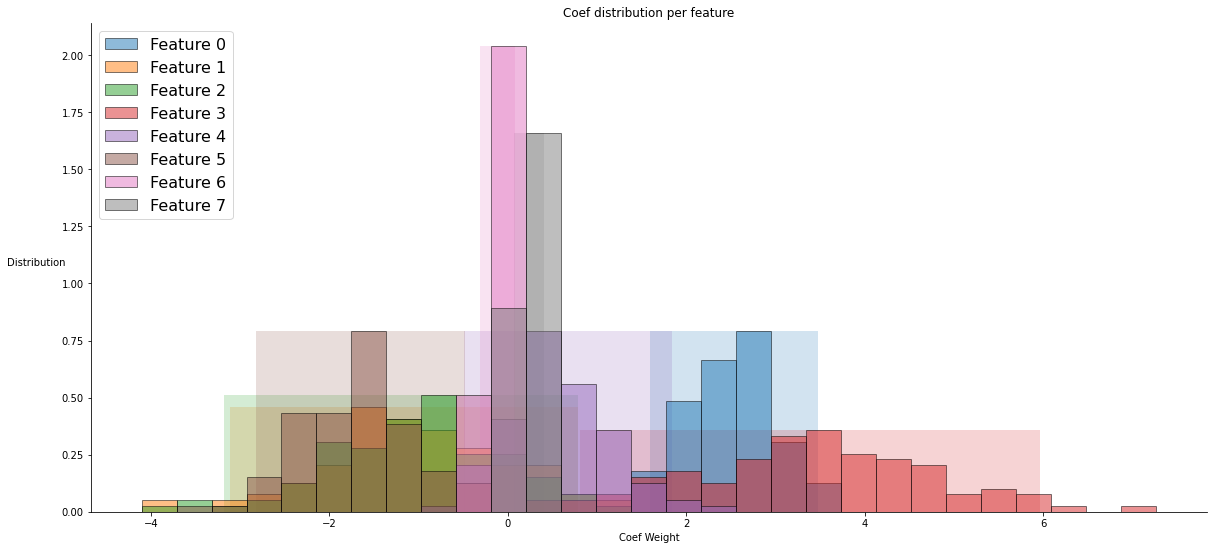

In [ ]:
# Plot all the coefficients histogram together (A seperate plot will follow below)

bin_start = min(coef_df.min())
bin_end = max(coef_df.max())
fig = plt.gcf()
fig.set_size_inches(20,9)
bins = np.linspace(bin_start, bin_end, 30)

for coef,values in coef_df.items():
    
    height, bins, patches = plt.hist(values, bins, alpha=0.5, label=f"Feature {coef}",density=True,edgecolor='k')
    plt.fill_betweenx([0, height.max()], coef_info[coef][0], coef_info[coef][1], alpha=0.2)
plt.legend(loc='upper left',fontsize=16)
plt.xlabel('Coef Weight')
plt.ylabel('Distribution',rotation=0,labelpad=25)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Coef distribution per feature')
plt.show()

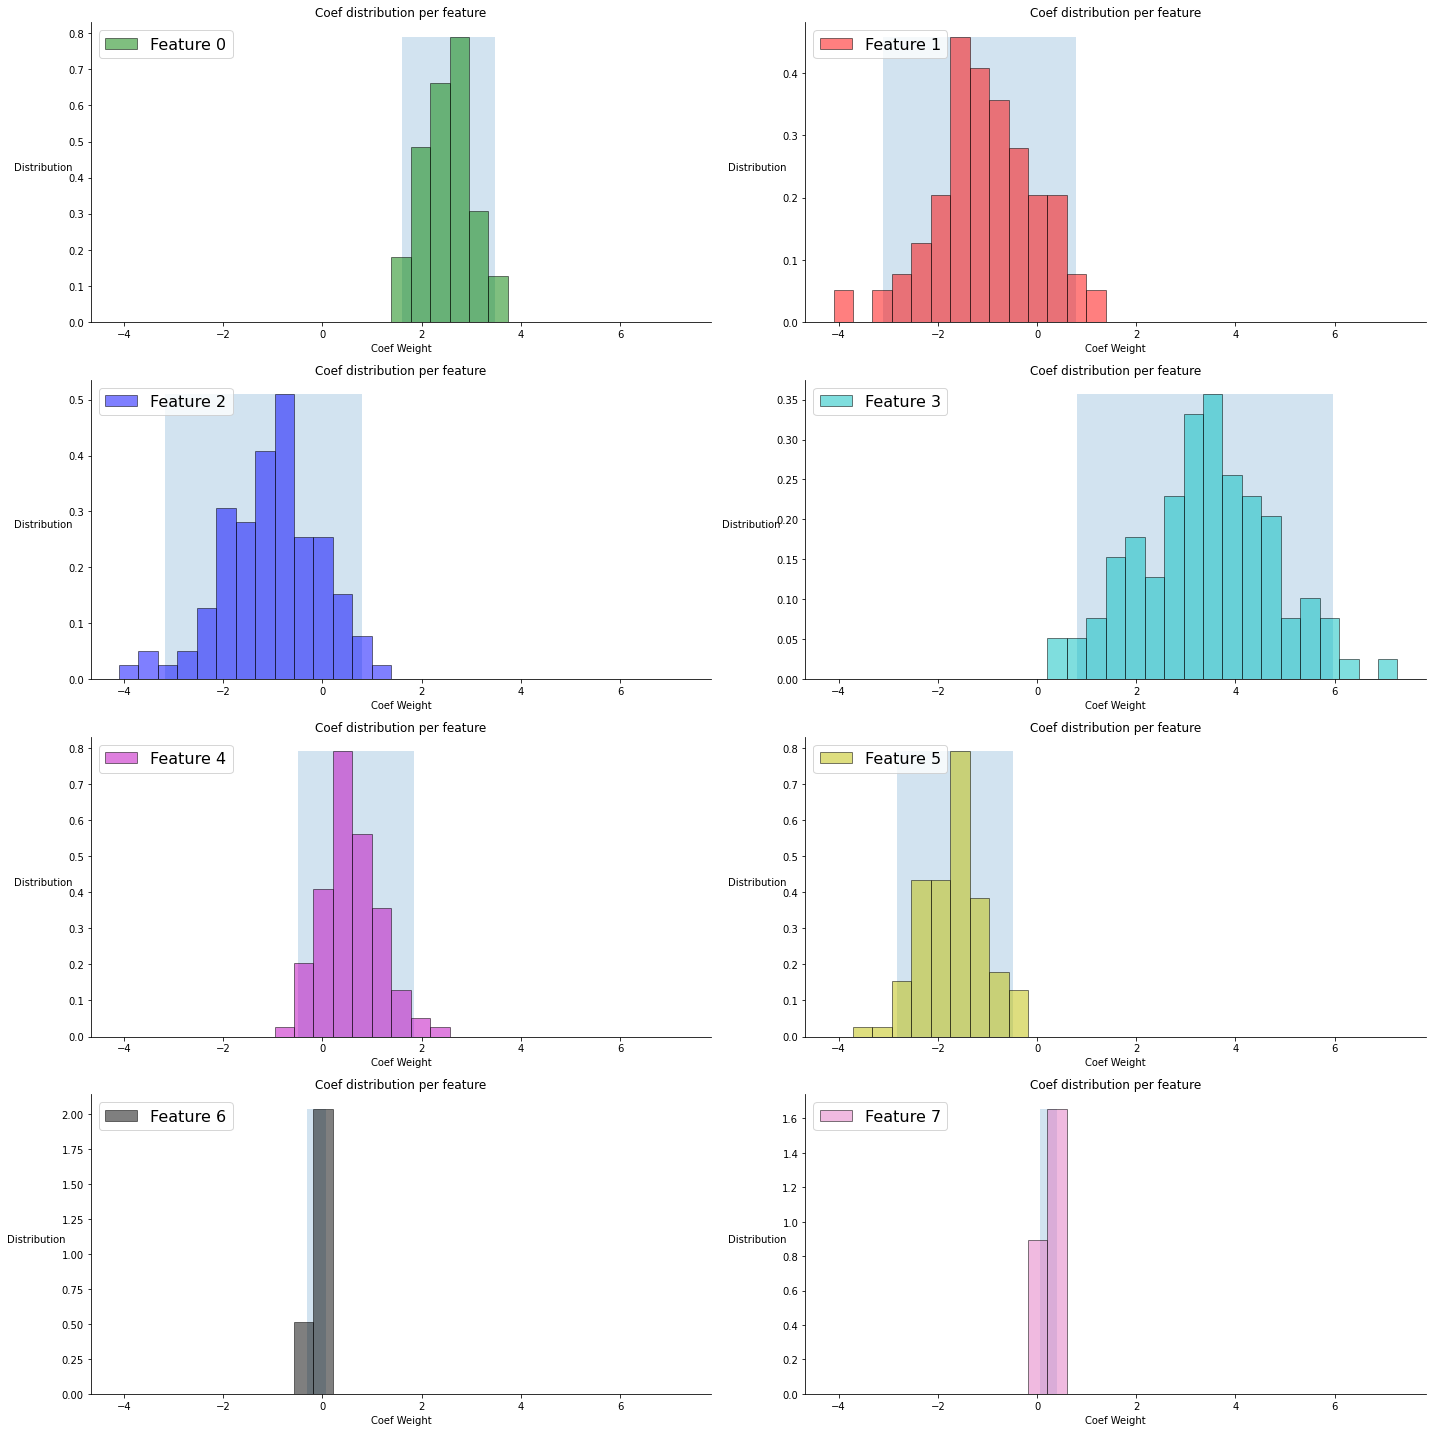

In [ ]:
# Plot all the coefficients histogram seperatly

import math

coeff_num = coef_df.shape[1]
row_num = int(coeff_num/2)
bin_start = min(coef_df.min())
bin_end = max(coef_df.max())

fig = plt.gcf()
fig.set_size_inches(20,20)
bins = np.linspace(bin_start, bin_end, 30)
c_list = ['g','r','b','c','m','y','k','tab:pink']

i=0
for coef,values in coef_df.items():
    
    ax = fig.add_subplot(row_num,2,i+1)
    height, bins, patches = ax.hist(values, bins, alpha=0.5, label=f"Feature {coef}",density=True,edgecolor='k', color=c_list[i])
    ax.fill_betweenx([0, height.max()], coef_info[coef][0], coef_info[coef][1], alpha=0.2)
    ax.legend(loc='upper left',fontsize=16)
    ax.set_xlabel('Coef Weight')
    ax.set_ylabel('Distribution',rotation=0,labelpad=25)
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title('Coef distribution per feature')
    i+=1

plt.tight_layout()
plt.plot;

# Linear Algebra


In [ ]:
def solve_system_eq(X, y):
  y_ = np.array(y)
  X_ = np.array(X)
  if X_.shape[1] == y_.shape[0]:
      print("Dimension check passed")
      inverse_X = np.linalg.inv(X_)
      return np.dot(inverse_X, y_)
  else:
      print("Dim mismatch")
      return 0

2x  + 3y  + 7z   = 4

66x + 4y + 75z   = 6

x   + 0y   + 34z = 99

In [ ]:
# This is the above equasion in numpy form:
M = [[2,3,7],[66,4,75],[1,0,34]]
y = [4,6,99]
print(solve_system_eq(M,y))

Dimension check passed
[-3.10314546 -3.60498164  3.00303369]


-3.10314546 + 0 + 34 * 3.00303369